# Recommendation System

There are 6 types of Recommendation Systems:

1. **Popularity Based Recommendation System** - This looks at the highest number of views and likes of each product and returns the product accrodingly. This is not a personal recommendation system.


2. **Classification Model Based** - This includes understanding the features of the user and then finding the Item based on the User's features/preferences. This is a personalized recommendation system.


3. **Content Based** - This is dependent on the content of the item and not the user's input. The idea is that if a user likes Product A, then he would also like Product B given that Product A and Product B are similar. Hence, Product B is found using this type of recommendation system.


4. **Collaborative Filtering** - This method involves recommending a user a product based on what other users similar to this particular users like. It uses a collective pattern/behaviour to analyse the preferences and recommend the products accordingly.


5. **Association Rule Mining** - Captures the relationship between items and based on their transaction patterns.


6. **Hybrid Approaches**

## Imports and Installations

In [22]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#Ignore Warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [23]:
df = pd.read_csv('ratings_Electronics.csv', names=['userId', 'productId','Rating','timestamp'])
df.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


## Preliminary Dataset Information

In [24]:
#shape of the dataset
df.shape

(7824482, 4)

Therefore, this dataset has 7,824,482 samples.

In [25]:
#Getting the datatype information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


Object data type refers to a string. So it performs String operations, instead of Mathematical Operations.

In [26]:
df_stats = df.describe()['Rating'].T
df_stats

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [27]:
LOWEST_RATING, HIGHEST_RATING, AVG_RATING = df_stats['min'], df_stats['max'], df_stats['mean']

print(f"Lowest Rating: {LOWEST_RATING}")
print(f"Highest Rating: {HIGHEST_RATING}")
print(f"Average Rating: {AVG_RATING:.3f}")

Lowest Rating: 1.0
Highest Rating: 5.0
Average Rating: 4.012


## Data Cleaning


This includes handling Missing values and accounting for any outliers or any data sample that does not make sense according to the domain knowledge. In this case, since the rating is between 1.0 - 5.0 as it should be, we can conclude that there are no outliers in the rating column.

Hence, the only Data Cleaning step to do at this stage is to check and remove Null Values.

### Check and Handling Missing Values

In [28]:
print(f"Number of Missing Values in each Column:\n{df.isnull().sum()}")

Number of Missing Values in each Column:
userId       0
productId    0
Rating       0
timestamp    0
dtype: int64


Therefore, there are no Null values present in the dataset.

## Popularity Based Recommendation System

This is a Brute Force approach where the products that have the highest engagement and popularity are returned. The metric to guage the engagement and popularity of a product ca be the **number of reviews** of a product, **regardless of whether the reviews are positive or negative**.

In this case we will be returning the **Top 10 products.**

### Filtering out all the productId with the Highest Number of Reviews

In [29]:
NUM = 10
popularity_final = df['productId'].value_counts()[:NUM].index.tolist()
popularity_final

['B0074BW614',
 'B00DR0PDNE',
 'B007WTAJTO',
 'B0019EHU8G',
 'B006GWO5WK',
 'B003ELYQGG',
 'B003ES5ZUU',
 'B007R5YDYA',
 'B00622AG6S',
 'B0002L5R78']

### Visualizing the Most Popular Top 10 Products

In [30]:
#Extracting out all the rows that contain the top 10 productIds
sub_df1 = df[['productId', 'Rating']]
top_pdts1 = sub_df1.query('productId in @popularity_final')
top_pdts1

,productId,Rating
483804,B0002L5R78,5.0
483805,B0002L5R78,5.0
483806,B0002L5R78,5.0
483807,B0002L5R78,3.0
483808,B0002L5R78,5.0
...,...,...
7448717,B00DR0PDNE,5.0
7448718,B00DR0PDNE,5.0
7448719,B00DR0PDNE,4.0
7448720,B00DR0PDNE,5.0


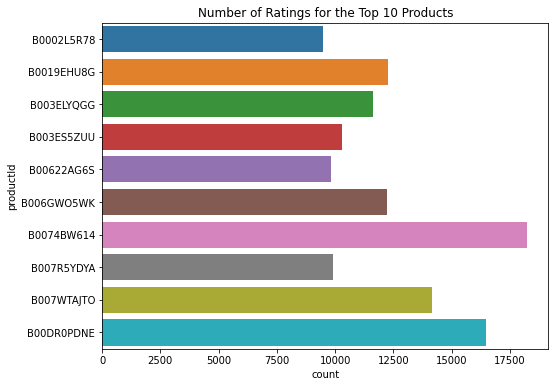

In [31]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

sb.countplot(data=top_pdts1, y='productId')

# Add a title and adjust its size
plt.title('Number of Ratings for the Top 10 Products')

plt.show()

### Analysis of Popularity Based Recommendation


Although this might be a straightforward approach, it however is a very black-and-white sort of approach that does not take into account the intricate nuances of the market and of the domain. 

In addition, a product can have the highest number of ratings, however, all or majority of the ratings can be negative reveiews. This would defeat the objective of recommending the best products to the users and in turn result in a lower customer satisfaction.

Hence, a better approach to this would be a **Hybrid Approach** where we can find the products with the highest number of ratings and from that list, we can then return the products that have the highest ratings. 

## Hybrid Approach #1 - Popularity Based ( # of Ratings) + Highest Average Rating

### Visualising the Distribution of the Ratings

In [32]:
#Converting the df into dictionaries
ratings_dict = {}

for product in popularity_final:
    l1 = top_pdts1.query('productId == @product')['Rating'].tolist()
    ratings_dict[product] = l1

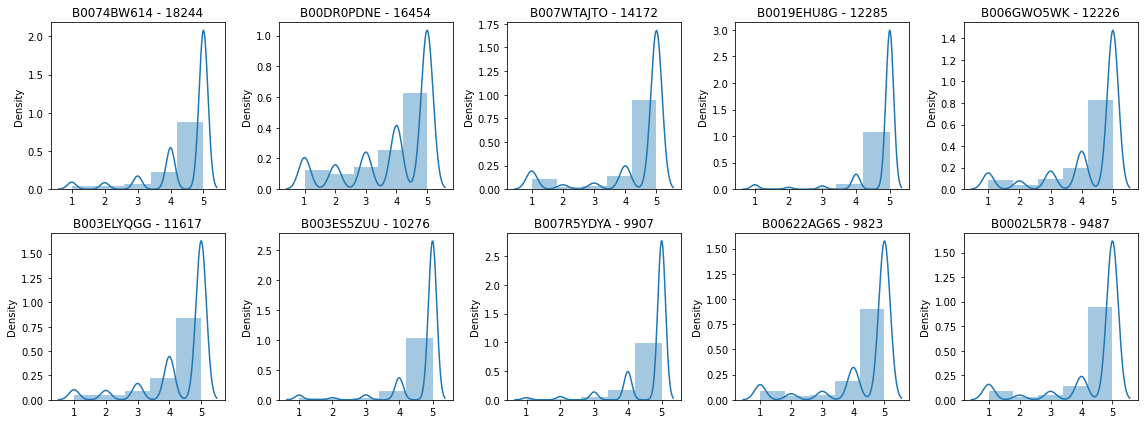

In [33]:
#Viualising the distribution of each of the 10 products
# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=len(ratings_dict)//2, figsize=(16, 6))

# Plot histograms for each product
i, j = 0, 0

for product, ratings in ratings_dict.items():
    axs[i,j].set_title(f"{product} - {len(ratings)}")
    sb.distplot(ratings, ax=axs[i,j], bins=5, kde=True)
    axs[i,j].set_xticks([1, 2, 3, 4, 5])
    
    if j == (len(ratings_dict)//2) - 1:
        j = 0
        i += 1
    else:
        j += 1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The above plots show the distributions of the top 10 products with the highest review. The title contains the Product ID as well as the Number of Ratings that that particular product got. 

This case is the best case, where most of the ratings of the top 10 most popular products are positive. 

Therefore, we need to calculate the average ratings of each of these products

### Calculating the Average Rating of Each of the Top 10 Products

In [34]:
avg_rating_top10 = top_pdts1.groupby(['productId']).mean()
avg_rating_top10

,Rating
productId,
B0002L5R78,4.448614
B0019EHU8G,4.754497
B003ELYQGG,4.392528
B003ES5ZUU,4.704749
B00622AG6S,4.420136
B006GWO5WK,4.314657
B0074BW614,4.491504
B007R5YDYA,4.690926
B007WTAJTO,4.424005


One option is to recommend the top 3 products from the top 10 list. The other option would be to recommend all the 10 prodcuts in the order of Highest Rating to Lowest Rating, to make it easy for the customer.

### Arranging the Top 10 Products in Descending Order of Rating

In [35]:
avg_rating = avg_rating_top10.to_dict()
avg_rating

{'Rating': {'B0002L5R78': 4.448613892695267,
  'B0019EHU8G': 4.754497354497355,
  'B003ELYQGG': 4.392528191443574,
  'B003ES5ZUU': 4.70474892954457,
  'B00622AG6S': 4.4201364145373105,
  'B006GWO5WK': 4.314657287747424,
  'B0074BW614': 4.491504056128042,
  'B007R5YDYA': 4.690925608155849,
  'B007WTAJTO': 4.424005080440304,
  'B00DR0PDNE': 3.9310198128114746}}

In [36]:
avg_rating = dict((v,k) for k,v in avg_rating['Rating'].items())

products = list(avg_rating.values())
avg_ratings = list(avg_rating.keys())

avg_ratings.sort(reverse=True)

hybrid1_top10_final = []

for rating in avg_ratings:
    hybrid1_top10_final.append(avg_rating[rating])
    
hybrid1_top10_final

['B0019EHU8G',
 'B003ES5ZUU',
 'B007R5YDYA',
 'B0074BW614',
 'B0002L5R78',
 'B007WTAJTO',
 'B00622AG6S',
 'B003ELYQGG',
 'B006GWO5WK',
 'B00DR0PDNE']

### Recommending only the Top 3 Products from this List

In [37]:
hybrid1_top10_final[:3]

['B0019EHU8G', 'B003ES5ZUU', 'B007R5YDYA']

In [39]:
#Saving to CSV 
final_csv = pd.DataFrame(popularity_final, columns=['popularity_final'])
final_csv

top_pdts1.to_csv('top_pdts1.csv')